In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [30]:
# Importamos el dataset para entrenar
data = pd.read_excel('Data\E-Commerce_train.xlsx')

In [31]:
#Exploramos los datos para familiarizarnos con las columnas y su contenido
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [32]:
#Buscar datos faltantes 
True in data.isnull().values

False

In [33]:
#Revisamos las variables categóricas en busca de valores incorrectos
print(data['Warehouse_block'].unique())
print(data['Mode_of_Shipment'].unique())
print(data['Product_importance'].unique())
print(data['Gender'].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [34]:
# Se buscan outliers o comportamientos atípicos
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [35]:
#Separamos las variables numéricas de las categóricas para tratar las categóricas
numerica = data.drop(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)
numerica.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


In [36]:
# Se extraen las variables categóricas y sehace una copia para codificarlas
categoricas = data.filter(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])
categoricas_e = categoricas.copy()
categoricas.tail()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
8994,D,Ship,low,F
8995,F,Ship,medium,M
8996,A,Ship,medium,F
8997,B,Ship,medium,F
8998,C,Ship,low,M


In [37]:
# Se extrae cada dato único de las variables categóricas y se ordenan alfabéticamente 
# para hacer los encoder de decodificación (pasar de categorías a números)
from sklearn.preprocessing import OrdinalEncoder

categorias_Warehouse_block = sorted(np.array(data['Warehouse_block'].unique()))
categorias_Mode_of_Shipment = sorted(np.array(data['Mode_of_Shipment'].unique()))
categorias_Product_importance = sorted(np.array(data['Product_importance'].unique()))
categorias_Gender = sorted(np.array(data['Gender'].unique()))

encoder1 = OrdinalEncoder(categories=[categorias_Warehouse_block])
encoder2 = OrdinalEncoder(categories=[categorias_Mode_of_Shipment])
encoder3 = OrdinalEncoder(categories=[categorias_Product_importance])
encoder4 = OrdinalEncoder(categories=[categorias_Gender])

In [38]:
# Se ajusta el encoder a los datos de cada una de las columnas
encoder1.fit(categoricas[['Warehouse_block']])
encoder2.fit(categoricas[['Mode_of_Shipment']])
encoder3.fit(categoricas[['Product_importance']])
encoder4.fit(categoricas[['Gender']])

OrdinalEncoder(categories=[['F', 'M']])

In [39]:
# Se hace la codificación de cada dato en las columnas de la tabla de las variables categóricas 
categoricas_e["Warehouse_block"] = encoder1.transform(categoricas[["Warehouse_block"]])
categoricas_e["Mode_of_Shipment"] = encoder2.transform(categoricas[["Mode_of_Shipment"]])
categoricas_e["Product_importance"] = encoder3.transform(categoricas[["Product_importance"]])
categoricas_e["Gender"] = encoder4.transform(categoricas[["Gender"]])

In [40]:
categoricas_e

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,3.0,0.0,1.0,0.0
1,4.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0
3,1.0,0.0,2.0,1.0
4,2.0,0.0,2.0,0.0
...,...,...,...,...
8994,3.0,2.0,1.0,0.0
8995,4.0,2.0,2.0,1.0
8996,0.0,2.0,2.0,0.0
8997,1.0,2.0,2.0,0.0


In [41]:
# Se analizan los datos resusltantes de la codificación
categoricas_e.describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,8999.000000,8999.000000,8999.000000,8999.000000
mean,2.333148,1.519502,1.336148,0.495499
std,1.490774,0.755827,0.639007,0.500008
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000
75%,4.000000,2.000000,2.000000,1.000000
max,4.000000,2.000000,2.000000,1.000000


In [42]:
# Se construye un nuevo dataset solo con variables numéricas para ingestar a los modelos
datos_e = pd.concat([numerica,categoricas_e],axis=1)
datos_e

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,4,2,177,3,44,1233,1,3.0,0.0,1.0,0.0
1,4,5,216,2,59,3088,1,4.0,0.0,1.0,1.0
2,2,2,183,4,48,3374,1,0.0,0.0,1.0,1.0
3,3,3,176,4,10,1177,1,1.0,0.0,2.0,1.0
4,2,2,184,3,46,2484,1,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,4177,1,3.0,2.0,1.0,0.0
8995,5,3,232,3,3,4526,0,4.0,2.0,2.0,1.0
8996,4,5,260,3,6,4221,0,0.0,2.0,2.0,0.0
8997,4,2,184,3,5,5931,1,1.0,2.0,2.0,0.0


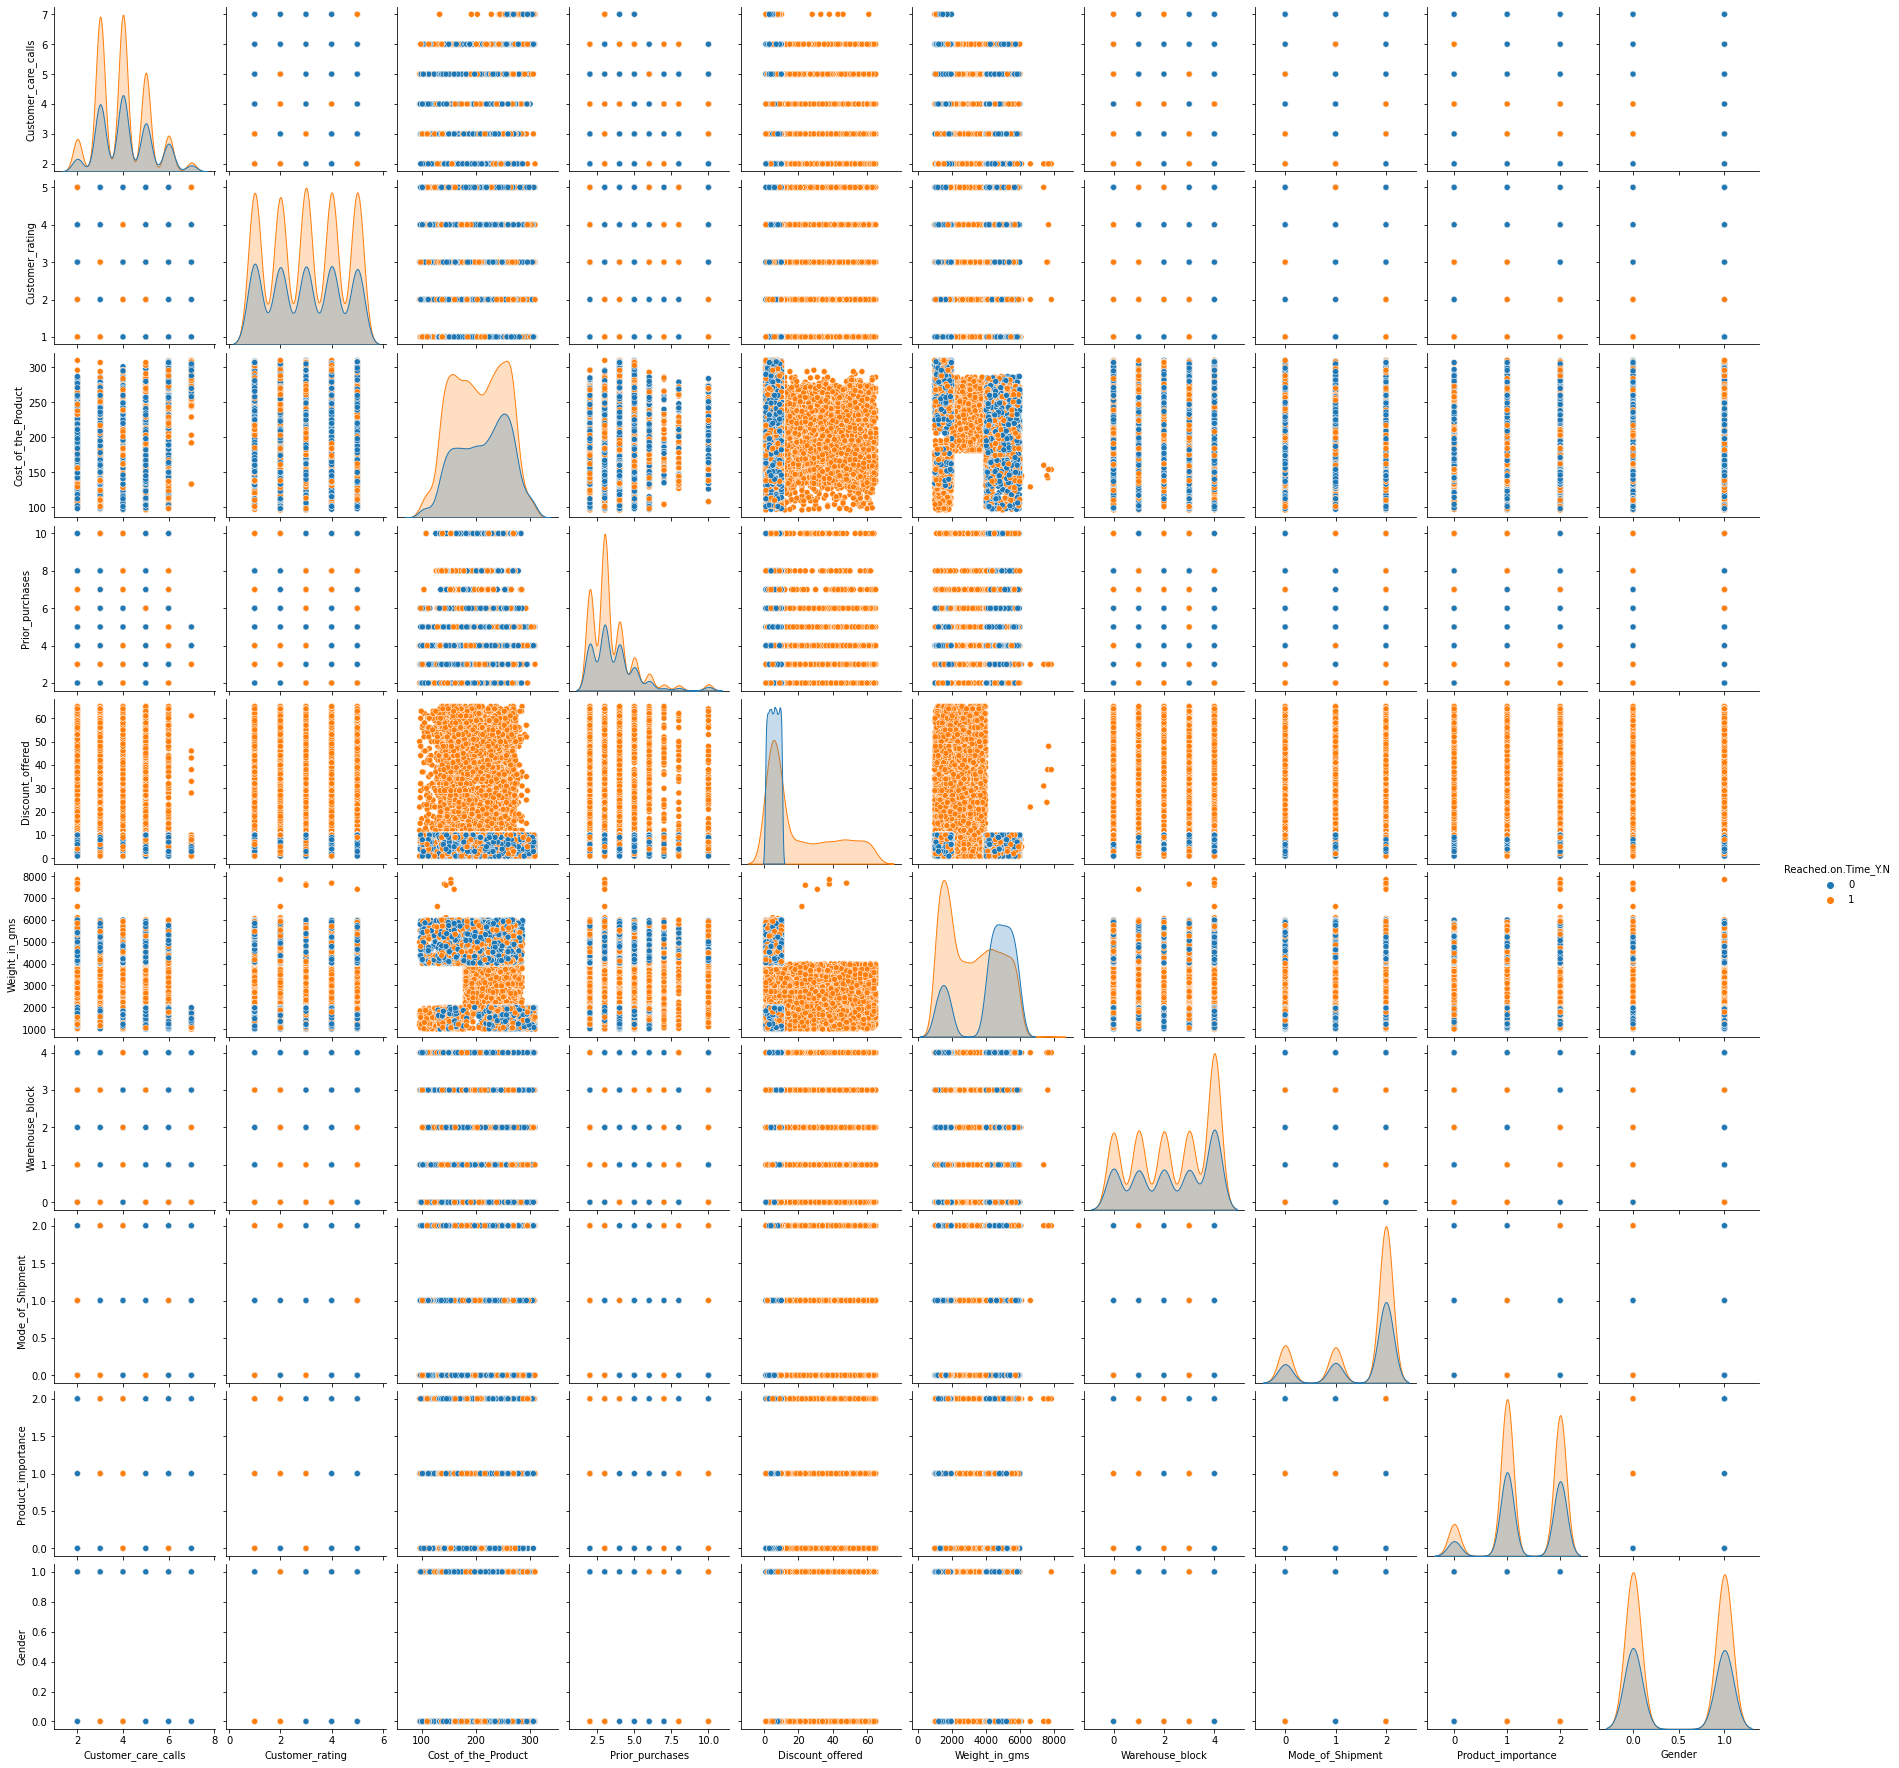

In [43]:
sns.pairplot(datos_e, hue='Reached.on.Time_Y.N')

In [44]:
# Se importan librerías para hace un análisis de componentes principales
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [45]:
# Se dividen los datos en entradas y salidas
X = datos_e.drop(['Reached.on.Time_Y.N','Gender'], axis=1)
y = datos_e['Reached.on.Time_Y.N']

In [46]:
# Se hace una estandarización de los datos
X = StandardScaler().fit_transform(X)

In [47]:
# Se dividen los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
print(X_train.shape,y_train.shape, X.shape, y.shape)

(6299, 9) (6299,) (8999, 9) (8999,)


Precision PCA con 2 componentes: 0.7407407407407407
Precision PCA con 3 componentes: 0.7415919282511211
Precision PCA con 4 componentes: 0.7415919282511211
Precision PCA con 5 componentes: 0.7435174746335964
Precision PCA con 6 componentes: 0.7429537767756482
Precision PCA con 7 componentes: 0.7412823397075365
Precision PCA con 8 componentes: 0.7518753606462781
Precision PCA con 9 componentes: 0.7482517482517482


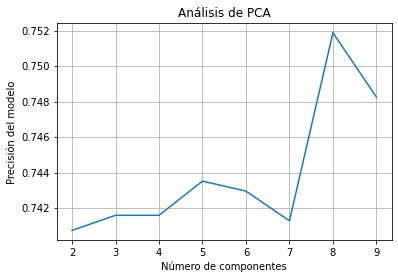

In [49]:
# Se hace una PCA con una regresión logística de 2 a 10 componentes
logistic = LogisticRegression(solver='lbfgs')
precisionpca = []
components = list(range(2, 10))

for i in components:
    pca = PCA(n_components = i)
    pca.fit(X_train)
    dt_train = pca.transform(X_train)
    dt_test = pca.transform(X_test)
    logistic.fit(dt_train, y_train)
    log_predic = logistic.predict(dt_test)
    score = precision_score(y_test, log_predic)
    precisionpca.append(score)
    print(f'Precision PCA con {i} componentes: {score}')

plt.plot(components, precisionpca)
plt.xlabel('Número de componentes')
plt.ylabel('Precisión del modelo')
plt.title('Análisis de PCA')
plt.grid()
plt.show()

Precision IPCA con 2 componentes: 0.7420993227990971
Precision IPCA con 3 componentes: 0.7420273348519362
Precision IPCA con 4 componentes: 0.7434733257661748
Precision IPCA con 5 componentes: 0.7439231204070096
Precision IPCA con 6 componentes: 0.741826381059752
Precision IPCA con 7 componentes: 0.7428734321550741
Precision IPCA con 8 componentes: 0.7515886770652802
Precision IPCA con 9 componentes: 0.7482517482517482


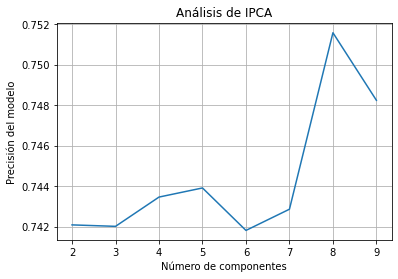

In [50]:
# Se hace una PCA con una regresión logística de 2 a 10 componentes
logistic = LogisticRegression(solver='lbfgs')
precisionipca = []

for i in components:
    ipca = IncrementalPCA(n_components = i,batch_size = 10)
    ipca.fit(X_train)
    dt_train = ipca.transform(X_train)
    dt_test = ipca.transform(X_test)
    logistic.fit(dt_train, y_train)
    log_predic = logistic.predict(dt_test)
    score = precision_score(y_test, log_predic)
    precisionipca.append(score)
    print(f'Precision IPCA con {i} componentes: {score}')

plt.plot(components, precisionipca)
plt.xlabel('Número de componentes')
plt.ylabel('Precisión del modelo')
plt.title('Análisis de IPCA')
plt.grid()
plt.show()
    

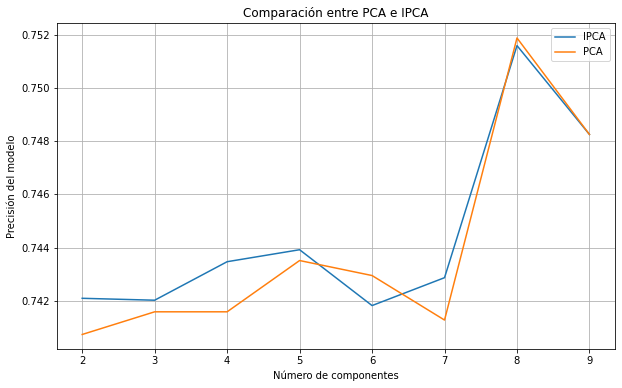

In [51]:
# Se grafican los dos conjuntos de scores (PCA e IPCA) para comparar visualmente su desempeño
# concluyendo que con 8 componentes principales la PCA tiene un mejor desempeño
plt.figure(figsize= (10,6))
plt.plot(components, precisionipca, label = 'IPCA')
plt.plot(components, precisionpca, label = 'PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Precisión del modelo')
plt.title('Comparación entre PCA e IPCA')
plt.legend()
plt.grid()
plt.show()

In [52]:
# Se entrena el modelo con el PCA elegido
pca = PCA(n_components = 8)
pca.fit(X_train)
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
log_predic = logistic.predict(dt_test)
score = precision_score(y_test, log_predic)
print(f'Precision PCA con 8 componentes: {score}')

Precision PCA con 8 componentes: 0.7518753606462781


In [53]:
# Importamos el dataset para entregar
data = pd.read_excel('Data\E-Commerce_test.xlsx')

#Separamos las variables numéricas de las categóricas para tratar las categóricas
numerica = data.drop(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)

# Se extraen las variables categóricas y sehace una copia para codificarlas
categoricas = data.filter(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])
categoricas_e = categoricas.copy()

# Se hace la codificación de cada dato en las columnas de la tabla de las variables categóricas
# con los encoders generados anteriormente
categoricas_e["Warehouse_block"] = encoder1.transform(categoricas[["Warehouse_block"]])
categoricas_e["Mode_of_Shipment"] = encoder2.transform(categoricas[["Mode_of_Shipment"]])
categoricas_e["Product_importance"] = encoder3.transform(categoricas[["Product_importance"]])
categoricas_e["Gender"] = encoder4.transform(categoricas[["Gender"]])

# Se construye un nuevo dataset solo con variables numéricas para ingestar a los modelos
datos_e = pd.concat([numerica,categoricas_e],axis=1)

# Se quita la variable genero ya que por el contexto del problema no se relaciona con el resultado
X = datos_e.drop(['Gender'], axis=1)
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance
0,5,1,189,2,10,5248,4.0,2.0,2.0
1,5,3,150,2,9,4446,3.0,2.0,0.0
2,3,3,200,3,3,5739,4.0,2.0,1.0
3,5,1,133,2,1,4643,0.0,2.0,2.0
4,4,2,260,3,4,5504,1.0,2.0,1.0


In [54]:
# Se normalizan los datos y se les aplica PCA para predecir con el nuevo dataset
X = StandardScaler().fit_transform(X)
dt_test = pca.transform(X)
log_predic = logistic.predict(dt_test)
print(log_predic)

[1 1 0 ... 1 1 1]


In [55]:
import os
import shutil

# Se guardan los resultados en un dataframe
log_predic = pd.DataFrame(log_predic,columns=['pred'])

# Se exporta el archivo con el nombre y formato pedido
path = 'C:/Users/Sebastián/Documents/Henry/ZIPs Repos Alumnos/PI/Datathon/Data'
log_predic.to_csv(path + '/sebas6112.csv',index=False)

